In [9]:
import pandas as pd
import numpy as np
from glob import glob
import re
import json
import os, torch
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# import stemmer as hindi_stemmer
%config Completer.use_jedi = False
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
# name = "xlm-roberta-base" #"bert-base-multilingual-uncased"
load_model = AutoModelForSequenceClassification.from_pretrained("/media/nas_mount/Zaki/hasoc/xlm-r/")
load_model.cuda()
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base") ##, additional_special_tokens=["[SENSEP]"])

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
name = "bert-base-multilingual-uncased"
load_model = AutoModelForSequenceClassification.from_pretrained("/media/nas_mount/Zaki/hasoc/mbert/")
load_model.cuda()
tokenizer = AutoTokenizer.from_pretrained(name) #, additional_special_tokens=["[SENSEP]"])

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
name = "ai4bharat/indic-bert"
load_model = AutoModelForSequenceClassification.from_pretrained("/media/nas_mount/Zaki/hasoc/indic-bert")
load_model.cuda()
tokenizer = AutoTokenizer.from_pretrained(name) #, additional_special_tokens=["[SENSEP]"])

In [5]:
def get_binary_labels(labels):
    for i, label in enumerate(labels):
        if(label=="HOF"):
            labels[i] = 1
        else:
            labels[i] = 0

    return np.array(labels) 

In [6]:
test_csv = pd.read_csv("processed_test.csv")
test_tweets = test_csv["text"].tolist()
tweet_ids = test_csv["tweet_id"].tolist()
len(test_tweets)
# test_csv

import json
import pandas as pd
with open('test_labels.json', 'r') as f:
    data = json.load(f)
test_labels_json = pd.DataFrame({"id" : list(data.keys()), "label" : list(data.values())}, index=None)
# test_labels = test_labels["label"].to_list()
# test_labels
# test_labels_json.reset_index(inplace=True)
test_labels = []
for i in range(len(test_csv)):
    id1 = int(tweet_ids[i])
#     print(id1)
    label = test_labels_json.loc[test_labels_json["id"]==str(id1)]["label"].tolist()
#     print(label)
    test_labels.append(label[0])
test_labels = get_binary_labels(test_labels)

In [16]:
'''submission csv'''
sub = pd.read_csv("submission/xlmr.csv")
sub = sub["label"].to_list()
sub = get_binary_labels(sub)
sub

array([0, 0, 0, ..., 0, 1, 1])

In [17]:
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, sub, average='macro')
acc = accuracy_score(test_labels, sub)

In [18]:
print(round(f1,4), " & ", round(precision,4)," & ", round(recall,4), " & ", 100*round(acc,4))

0.697  &  0.697  &  0.697  &  69.73


### mislabeled samples

In [59]:
## order indic, multi, xlm, soft, hard
pred_list = {}

In [71]:
sub = pd.read_csv("submission/hard-vote-ensemble.csv")
sub = sub["label"].to_list()
sub = get_binary_labels(sub)
sub

array([0, 0, 0, ..., 0, 1, 1])

In [72]:
pred_list["Hard Voting Ensemble"] = sub

In [77]:
hof_count = 0
not_count = 0

total_hof = list(test_labels).count(1)
total_not = list(test_labels).count(0)

for key in pred_list:
    sub = pred_list[key]
    hof_count = 0
    not_count = 0
    for i in range(len(sub)):
        if(sub[i]!=test_labels[i]):
            if(test_labels[i]==1):
                hof_count+=1
            else:
                not_count+=1
    print(key)
    print(hof_count, not_count)
    print("%", 100*hof_count/total_hof, 100*not_count/total_not)
print("total HOF", list(test_labels).count(1))
print("total NOT", list(test_labels).count(0))

Indic-BERT
162 263
% 23.309352517985612 40.275650842266465
Multilingual BERT
207 193
% 29.784172661870503 29.555895865237368
XLM-RoBERTa
204 204
% 29.35251798561151 31.240428790199083
Soft Voting Ensemble
168 205
% 24.172661870503596 31.39356814701378
Hard Voting Ensemble
165 204
% 23.741007194244606 31.240428790199083
total HOF 695
total NOT 653


In [106]:
'''studying samples'''
df = pd.read_csv("original_test.csv")
df

,Unnamed: 0,tweet_id,text
0,0,1396844054818680835,Bhadva Ramdev was brought to a debate about Al...
1,1,1396844158283776004,Bhadva Ramdev was brought to a debate about Al...
2,2,1397043581446098945,Bhadva Ramdev was brought to a debate about Al...
3,3,1398265913749635073,Bhadva Ramdev was brought to a debate about Al...
4,4,1396852220268716032,Bhadva Ramdev was brought to a debate about Al...
...,...,...,...
1343,1343,1397189986437537803,Crocodile is busy in diverting the issue to in...
1344,1344,1397209328013164548,Crocodile is busy in diverting the issue to in...
1345,1345,1397217889237745666,Crocodile is busy in diverting the issue to in...
1346,1346,1397224681229504520,Crocodile is busy in diverting the issue to in...


In [109]:
df

,Unnamed: 0,tweet_id,text
0,0,1396844054818680835,Bhadva Ramdev was brought to a debate about Al...
1,1,1396844158283776004,Bhadva Ramdev was brought to a debate about Al...
2,2,1397043581446098945,Bhadva Ramdev was brought to a debate about Al...
3,3,1398265913749635073,Bhadva Ramdev was brought to a debate about Al...
4,4,1396852220268716032,Bhadva Ramdev was brought to a debate about Al...
...,...,...,...
1343,1343,1397189986437537803,Crocodile is busy in diverting the issue to in...
1344,1344,1397209328013164548,Crocodile is busy in diverting the issue to in...
1345,1345,1397217889237745666,Crocodile is busy in diverting the issue to in...
1346,1346,1397224681229504520,Crocodile is busy in diverting the issue to in...


In [110]:
hof_samples = []
not_samples = []

total_hof = list(test_labels).count(1)
total_not = list(test_labels).count(0)

keys = ['Soft Voting Ensemble', 'Hard Voting Ensemble']
for key in keys:
    sub = pred_list[key]
    for i in range(len(sub)):
        if(sub[i]!=test_labels[i]):
            if(test_labels[i]==1):
                hof_samples.append(df.iloc[i]["text"])
            else:
                not_samples.append(df.iloc[i]["text"])
    print(key)

Soft Voting Ensemble
Hard Voting Ensemble


In [114]:
not_samples

['Bhadva Ramdev was brought to a debate about Allopathy to sit with doctors &amp; discuss his statement\nThe debate with sponsored by Coronil - https://t.co/qOP3Ucnx0s [SENSEP] @control_toni @kunalkamra88 In comedy?? [SENSEP] @prem_singh420 @control_toni @kunalkamra88 No motivate? Jo tujhe hazam nhi hoga',
 'Bhadva Ramdev was brought to a debate about Allopathy to sit with doctors &amp; discuss his statement\nThe debate with sponsored by Coronil - https://t.co/qOP3Ucnx0s [SENSEP] @kunalkamra88 Why are raids being conducted at the Twitter India office by the government ? [SENSEP] @iamrahmankaif @kunalkamra88 System ko Bura lag gya...ki twitter apne platform pe jhooth ni failane de ra',
 "Bhadva Ramdev was brought to a debate about Allopathy to sit with doctors &amp; discuss his statement\nThe debate with sponsored by Coronil - https://t.co/qOP3Ucnx0s [SENSEP] @kunalkamra88 What next?\nDiscussion on farm laws, sponsored by Adani?\nDiscussion on Vijay Mallya's innocence sponsored by Kingf

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, sub)

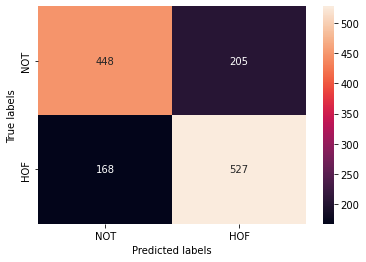

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NOT', 'HOF']); ax.yaxis.set_ticklabels(['NOT', 'HOF']);

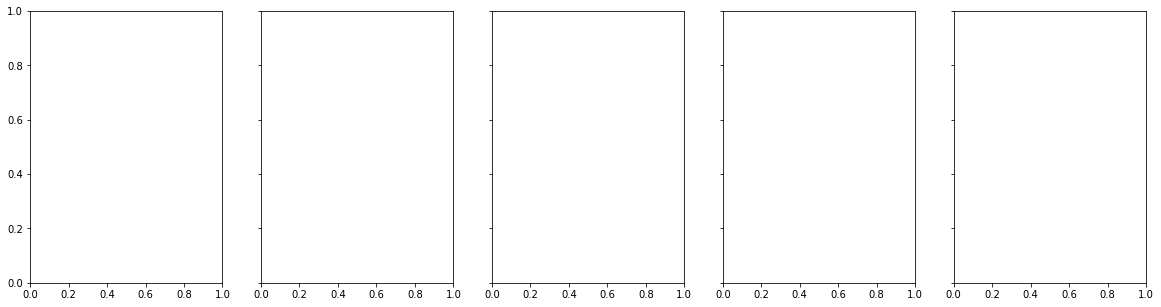

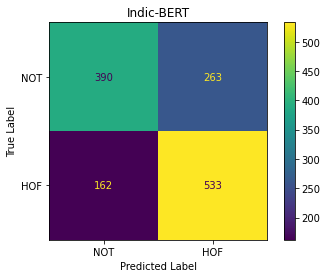

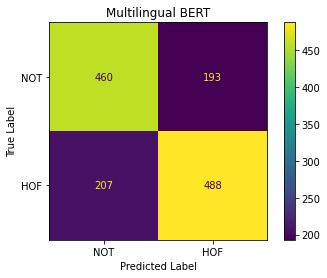

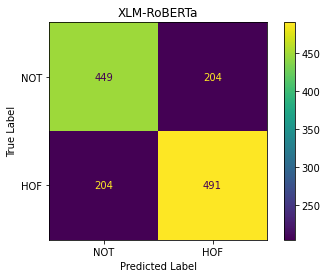

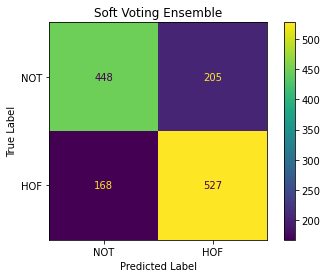

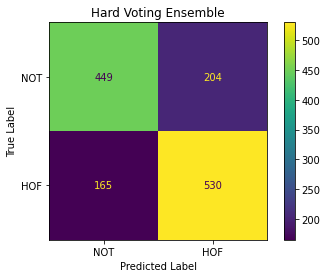

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

i=0
for key in pred_list:
    sub = pred_list[key]
    cm = confusion_matrix(test_labels, sub)
    disp = ConfusionMatrixDisplay(cm,
                                  display_labels=['NOT', 'HOF'])
    disp.plot(ax=None, xticks_rotation='horizontal', include_values=True)
    disp.ax_.set_title(key)
#     disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Predicted Label')
    disp.ax_.set_ylabel('True Label')
#     if i!=0:
#         disp.ax_.set_ylabel('')
    i+=1
    plt.savefig('figures/cm_' + key+ '.eps', format='eps', bbox_inches='tight')

# f.text(0.4, 0.1, 'Predicted label', ha='left')
# plt.subplots_adjust(wspace=0.40, hspace=0.1)


# f.colorbar(disp.im_, ax=axes, shrink=0.6)
# plt.show()


# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=['NOT', 'HOF'])

# # NOTE: Fill all variables here with default values of the plot_confusion_matrix
# disp = disp.plot(include_values=True,
#                  cmap='viridis', ax=None, xticks_rotation='horizontal')

# plt.show()

In [118]:
pred_list.keys()

dict_keys(['Indic-BERT', 'Multilingual BERT', 'XLM-RoBERTa', 'Soft Voting Ensemble', 'Hard Voting Ensemble'])

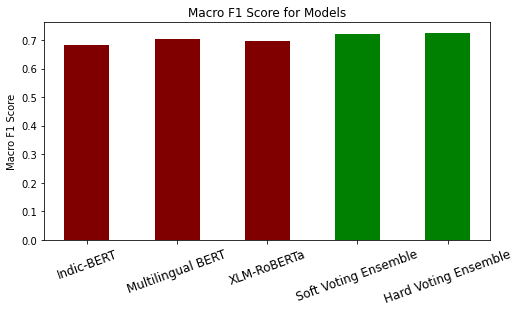

In [151]:
'''bar'''

import numpy as np
import matplotlib.pyplot as plt
data = {'Indic-BERT':0.6811, 'Multilingual BERT':.7031, 'XLM-RoBERTa':.6970,
       'Soft Voting Ensemble':.7223, 'Hard Voting Ensemble':0.7253}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 4))
 
plt.xticks(
    rotation=20, 
    horizontalalignment='center',
    fontsize='12'  
)

# creating the bar plot
plt.bar(courses, values, color =['maroon', 'maroon', 'maroon', 'green', 'green'],
        width = 0.5)

# plt.xlabel("Model")
plt.ylabel("Macro F1 Score")
plt.title("Macro F1 Score for Models")
plt.savefig("figures/f1_bar.eps", format="eps", bbox_inches='tight')
plt.show()